In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Air_Quality.csv')

In [3]:
df.head(10)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
5,2023-01-01 05:00:00+00:00,Brasilia,208.0,13.95,1.15,36.0,5.6,8.0,18.574999
6,2023-01-01 06:00:00+00:00,Brasilia,166.0,8.20,1.05,41.0,5.1,7.2,17.824999
7,2023-01-01 07:00:00+00:00,Brasilia,152.0,6.30,1.00,41.0,4.9,6.9,17.275000
8,2023-01-01 08:00:00+00:00,Brasilia,146.0,5.55,0.95,40.0,4.9,7.0,16.875000
9,2023-01-01 09:00:00+00:00,Brasilia,139.0,4.90,0.90,40.0,4.9,7.0,16.566666


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df["Date"] = df["Date"].dt.hour

In [6]:
df["City"].unique()

array(['Brasilia', 'Cairo', 'Dubai', 'London', 'New York', 'Sydney'],
      dtype=object)

In [7]:
mapping = {
    "Brasilia": 1,
    "Cairo": 2,
    "Dubai": 3,
    "London": 4,
    "New York": 5,
    "Sydney": 6
}

df["City"] = df["City"].map(mapping)


In [8]:
df.head(10)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,0,1,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,1,1,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2,1,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,3,1,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,4,1,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
5,5,1,208.0,13.95,1.15,36.0,5.6,8.0,18.574999
6,6,1,166.0,8.20,1.05,41.0,5.1,7.2,17.824999
7,7,1,152.0,6.30,1.00,41.0,4.9,6.9,17.275000
8,8,1,146.0,5.55,0.95,40.0,4.9,7.0,16.875000
9,9,1,139.0,4.90,0.90,40.0,4.9,7.0,16.566666


In [9]:
df.isnull().sum()

Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  int32  
 1   City    52560 non-null  int64  
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 3.4 MB


In [12]:
df.head(9)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,0,1,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,1,1,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2,1,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,3,1,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,4,1,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
5,5,1,208.0,13.95,1.15,36.0,5.6,8.0,18.574999
6,6,1,166.0,8.20,1.05,41.0,5.1,7.2,17.824999
7,7,1,152.0,6.30,1.00,41.0,4.9,6.9,17.275000
8,8,1,146.0,5.55,0.95,40.0,4.9,7.0,16.875000


In [15]:
df.columns = df.columns.str.replace('.', '_', regex=False)

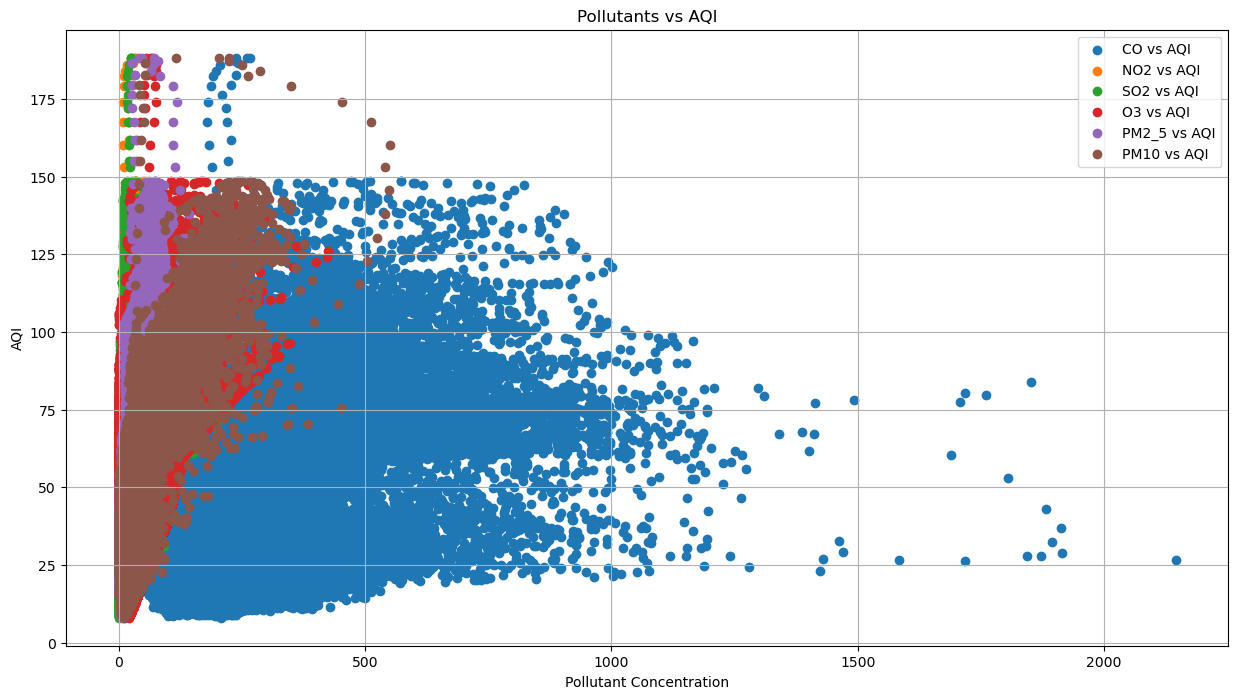

In [21]:
CO = df.CO
NO2 = df.NO2
SO2 = df.SO2
O3 = df.O3
PM2_5 = df.PM2_5
PM10 = df.PM10
AQI = df.AQI

pollutants = {
    'CO': CO,
    'NO2': NO2,
    'SO2': SO2,
    'O3': O3,
    'PM2_5': PM2_5,
    'PM10': PM10
}

plt.figure(figsize=(15, 8))

for name, values in pollutants.items():
    plt.scatter(values, AQI, label=f'{name} vs AQI')

plt.xlabel('Pollutant Concentration')
plt.ylabel('AQI')
plt.title('Pollutants vs AQI')
plt.legend()
plt.grid(True)
plt.show()

## Building Deep Neural Network

In [ ]:
def linear(x):
     return x

def linear_derivative(x):
    return np.ones_like(x)

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [ ]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

def huber_derivative(y_true, y_pred, delta=1.0):
    error = y_pred - y_true
    is_small_error = np.abs(error) <= delta
    return np.where(is_small_error, error, delta * np.sign(error)) / y_true.size